In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


#### Imputing cells with entry 'Select' by Null value since it is as good as Null (mentioned in the problem statement)

In [43]:
df=df.replace('Select',np.nan)
(df=='Select').sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [44]:
print(df.shape)
print(df.info())

(9240, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                             

## Data Cleaning

In [45]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [46]:
round(100*(((df.isnull()).sum())/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### It is impossible to either delete or impute the rows corresponding to such large number of missing values (>30%)without losing a lot of data or introducing heavy bias.

In [47]:
df.drop(['City','Lead Profile','Specialization','How did you hear about X Education','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Tags'],axis=1,inplace=True)

In [48]:
round(100*((df.isnull().sum())/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [49]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


#### Treating missing values in row

In [50]:
# Counting the number of rows with more than 5 missing values
len(df[df.isnull().sum(axis=1)>4].index)

9

In [51]:
# Percentage of such rows
round(100*(len(df[df.isnull().sum(axis=1)>4].index)/len(df.index)),2)

0.1

In [52]:
# Removing all the rows with null values greater than 5
df=df[df.isnull().sum(axis=1)<=5]

In [53]:
round(100*((df.isnull().sum())/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [54]:
df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [55]:
# Removing the Country column due to redundance
df.drop(['Country'],axis=1,inplace=True)

In [56]:
round(100*((df.isnull().sum())/len(df.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [57]:
#Dropping two more valiables for the same reason
df.drop(['What matters most to you in choosing a course','What is your current occupation'],axis=1,inplace=True)

In [58]:
round(100*((df.isnull().sum())/len(df.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [59]:
print(df['TotalVisits'].describe())
df['TotalVisits'].isnull().sum()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


137

In [60]:
# Removing Nans in 'TotalVisits'
df=df[~np.isnan(df['TotalVisits'])]

In [61]:
round(100*((df.isnull().sum())/len(df.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.32
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 0.00
Total Time Spent on Website                 0.00
Page Views Per Visit                        0.00
Last Activity                               0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Co

In [62]:
# Removing Nulls in 'Lead Source'
df=df[~df['Lead Source'].isnull()]

In [63]:
round(100*((df.isnull().sum())/len(df.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

In [64]:
df.shape

(9074, 24)

#### We are left with over 9000 rows and 24 columns and no null values

In [65]:
# Inspecting the remmaining dataframe
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
Prospect ID                                 9074 non-null object
Lead Number                                 9074 non-null int64
Lead Origin                                 9074 non-null object
Lead Source                                 9074 non-null object
Do Not Email                                9074 non-null object
Do Not Call                                 9074 non-null object
Converted                                   9074 non-null int64
TotalVisits                                 9074 non-null float64
Total Time Spent on Website                 9074 non-null int64
Page Views Per Visit                        9074 non-null float64
Last Activity                               9074 non-null object
Search                                      9074 non-null object
Magazine                                    9074 non-null object
Newspaper Article                           9074 

In [66]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


## Data Preparation

In [67]:
# Converting Yes to 1 and No to 0
df['Do Not Email']=df['Do Not Email'].map({'Yes' : 1, "No" : 0})

In [68]:
df['Do Not Call']=df['Do Not Call'].map({'Yes' : 1, "No" : 0})

In [69]:
df['Search']=df['Search'].map({'Yes' : 1, "No" : 0})
df['Magazine']=df['Magazine'].map({'Yes' : 1, "No" : 0})
df['Newspaper Article']=df['Newspaper Article'].map({'Yes' : 1, "No" : 0})
df['X Education Forums']=df['X Education Forums'].map({'Yes' : 1, "No" : 0})
df['Newspaper']=df['Newspaper'].map({'Yes' : 1, "No" : 0})
df['Digital Advertisement']=df['Digital Advertisement'].map({'Yes' : 1, "No" : 0})
df['Through Recommendations']=df['Through Recommendations'].map({'Yes' : 1, "No" : 0})
df['Receive More Updates About Our Courses']=df['Receive More Updates About Our Courses'].map({'Yes' : 1, "No" : 0})
df['Update me on Supply Chain Content']=df['Update me on Supply Chain Content'].map({'Yes' : 1, "No" : 0})
df['Get updates on DM Content']=df['Get updates on DM Content'].map({'Yes' : 1, "No" : 0})
df['I agree to pay the amount through cheque']=df['I agree to pay the amount through cheque'].map({'Yes' : 1, "No" : 0})
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].map({'Yes' : 1, "No" : 0})

In [70]:
# Creating Dummy Variables
# Lead Origin
LO=pd.get_dummies(df['Lead Origin'],prefix='Lead Origin',drop_first=True)
df=pd.concat([df,LO],axis=1)
# Lead Source
LS=pd.get_dummies(df['Lead Source'],prefix='Lead Source',drop_first=True)
df=pd.concat([df,LS],axis=1)
# Last Notable Activity
LNA=pd.get_dummies(df['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
df=pd.concat([df,LNA],axis=1)
# Last Activity
LA=pd.get_dummies(df['Last Activity'],prefix='Last Activity',drop_first=True)
df=pd.concat([df,LA],axis=1)

In [71]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.00,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.50,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.00,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.00,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.00,...,0,0,0,0,0,0,0,0,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,0,0,0,0.0,0,0.00,...,0,0,1,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,0,0,1,2.0,1640,2.00,...,0,0,0,0,0,0,0,0,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,0,0,0,0.0,0,0.00,...,0,0,1,0,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,0,0,0,2.0,71,2.00,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,0,0,0,4.0,58,4.00,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Dropping the repeats
df=df.drop(['Lead Origin','Lead Source','Last Notable Activity','Last Activity'],1)

In [73]:
df

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.50,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.00,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.00,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.00,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,0,0,0,0.0,0,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,0,1,2.0,1640,2.00,0,0,...,0,0,0,0,0,0,0,0,0,0
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,0,0,0,0.0,0,0.00,0,0,...,0,0,1,0,0,0,0,0,0,0
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,0,0,0,2.0,71,2.00,0,0,...,0,0,0,0,0,0,0,0,0,0
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,0,0,0,4.0,58,4.00,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 74 columns):
Prospect ID                                           9074 non-null object
Lead Number                                           9074 non-null int64
Do Not Email                                          9074 non-null int64
Do Not Call                                           9074 non-null int64
Converted                                             9074 non-null int64
TotalVisits                                           9074 non-null float64
Total Time Spent on Website                           9074 non-null int64
Page Views Per Visit                                  9074 non-null float64
Search                                                9074 non-null int64
Magazine                                              9074 non-null int64
Newspaper Article                                     9074 non-null int64
X Education Forums                                    9074 non-null int64


#### All variables are numeric

In [75]:
df_num=df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
df_num.describe(percentiles=[.25,.5,.75,.90,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1bb4ffcf668>,
 'caps': [<matplotlib.lines.Line2D at 0x1bb4ffcff28>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bb4ffcf518>],
 'medians': [<matplotlib.lines.Line2D at 0x1bb4ffd97b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bb4ffd9be0>],
 'means': []}

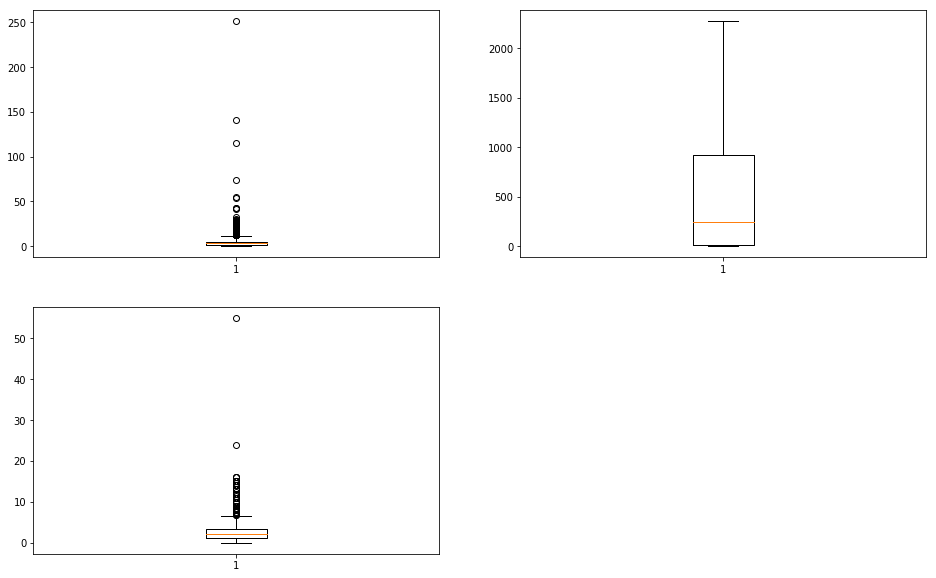

In [76]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.boxplot(df['TotalVisits'])
plt.subplot(2,2,2)
plt.boxplot(df['Total Time Spent on Website'])
plt.subplot(2,2,3)
plt.boxplot(df['Page Views Per Visit'])

### Outliers exist but can be dealt with after creating Principal Components

## Standardise the data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]=scaler.fit_transform(df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [78]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9.074000e+03,9.074000e+03,9.074000e+03
mean,-5.285366e-16,-2.310497e-16,4.933237e-16
std,1.000055e+00,1.000055e+00,1.000055e+00
min,-7.113315e-01,-8.856640e-01,-1.096911e+00
25%,-5.055081e-01,-8.654889e-01,-6.341086e-01
50%,-9.386128e-02,-4.344754e-01,-1.713066e-01
75%,3.177855e-01,8.067519e-01,3.840558e-01
max,5.095034e+01,3.281411e+00,2.435720e+01


##

##

### For group members : Suggested approach = Data Cleaning(done)--->Preparation(done)--->Standardisation(done)--->Test train split---->PCA---->Outlier Removal------>ModelFitting

I have mentioned the approach for your comfortable understanding of my thought process.Open to changes and reviews .Thank you.

In [82]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,-0.711332,-0.885664,-1.096911,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,0.317786,0.350519,0.060094,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,-0.299685,1.924177,-0.171307,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,-0.505508,-0.326263,-0.634109,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,-0.299685,1.733431,-0.634109,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
#Removing prospect id as well
df = df.drop('Prospect ID',axis=1)

In [85]:
df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,660737,0,0,0,-0.711332,-0.885664,-1.096911,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,660728,0,0,0,0.317786,0.350519,0.060094,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,0,0,1,-0.299685,1.924177,-0.171307,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,0,0,-0.505508,-0.326263,-0.634109,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,660681,0,0,1,-0.299685,1.733431,-0.634109,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#Performing PCA on final data frame
#Dropping lead Number as of now
df_pca = df.drop('Lead Number',axis=1)

In [87]:
df_pca.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,-0.711332,-0.885664,-1.096911,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0.317786,0.350519,0.060094,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,-0.299685,1.924177,-0.171307,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,-0.505508,-0.326263,-0.634109,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,-0.299685,1.733431,-0.634109,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [89]:
#Doing the PCA on the train data
pca.fit(df_pca)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [90]:
pca.components_

array([[ 4.22047307e-03, -1.66565365e-05,  5.77603504e-02, ...,
         8.66070440e-04,  2.14184341e-04,  1.45259203e-05],
       [ 2.56387972e-02, -1.11357497e-04, -2.50508125e-01, ...,
         1.40712348e-03,  7.35031275e-04,  1.05471165e-04],
       [ 5.47998996e-02,  5.03744634e-05,  9.70473055e-02, ...,
         1.67397135e-03,  4.57648666e-04,  4.85119315e-05],
       ...,
       [-0.00000000e+00, -2.95824563e-16,  1.63613311e-16, ...,
         7.63278329e-17, -4.61436445e-16,  5.29090660e-17],
       [-0.00000000e+00,  7.96183496e-17,  4.60718519e-17, ...,
        -4.16333634e-17, -2.49800181e-16, -2.77555756e-17],
       [ 0.00000000e+00,  9.23543621e-18,  1.29230945e-16, ...,
        -1.11022302e-16, -4.16333634e-17,  1.12757026e-16]])

In [91]:
colnames = list(df_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.004220,0.025639,Do Not Email
1,-0.000017,-0.000111,Do Not Call
2,0.057760,-0.250508,Converted
3,0.542953,0.456283,TotalVisits
4,0.457337,-0.778844,Total Time Spent on Website


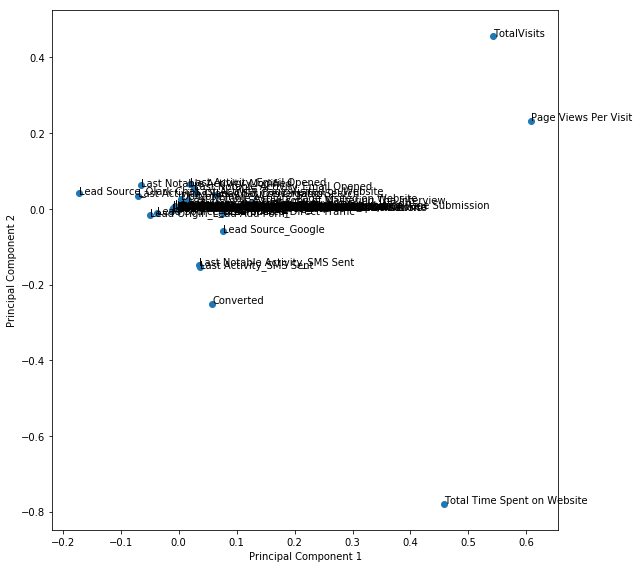

In [92]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [93]:
pca.explained_variance_ratio_

array([3.16591204e-01, 1.43802213e-01, 9.66542574e-02, 8.59912648e-02,
       7.19757056e-02, 6.93631369e-02, 3.73370718e-02, 2.82816695e-02,
       2.07268141e-02, 1.84449611e-02, 1.68009496e-02, 1.43229811e-02,
       1.22168204e-02, 1.14683204e-02, 9.49423788e-03, 8.64229087e-03,
       6.45191043e-03, 4.97974607e-03, 3.35663697e-03, 3.25917575e-03,
       3.12185055e-03, 2.63592662e-03, 2.52576058e-03, 2.31126504e-03,
       1.98188072e-03, 1.55569027e-03, 1.16265382e-03, 1.01785134e-03,
       7.79567284e-04, 6.75926472e-04, 3.60653498e-04, 2.79691083e-04,
       1.46484135e-04, 1.36504890e-04, 1.21836693e-04, 1.14830340e-04,
       9.69953691e-05, 8.79000489e-05, 7.91405688e-05, 7.33634865e-05,
       6.76993974e-05, 5.16414088e-05, 4.95650489e-05, 3.85985405e-05,
       3.62206163e-05, 3.61263104e-05, 3.07303613e-05, 2.67394865e-05,
       2.22062936e-05, 2.04731376e-05, 1.95862620e-05, 1.81678376e-05,
       1.81667893e-05, 1.81654916e-05, 1.81527070e-05, 1.81248232e-05,
      

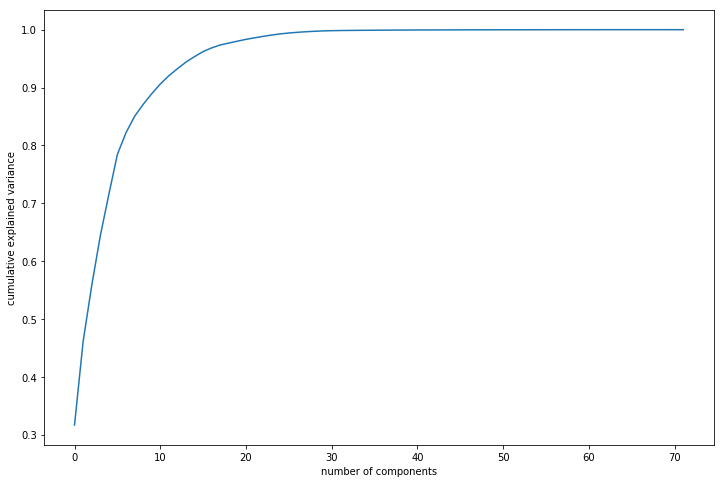

In [94]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [95]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

In [96]:
df_pca_final = pca_final.fit_transform(df_pca)
df_pca_final.shape

(9074, 15)

In [97]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_pca_final.transpose())

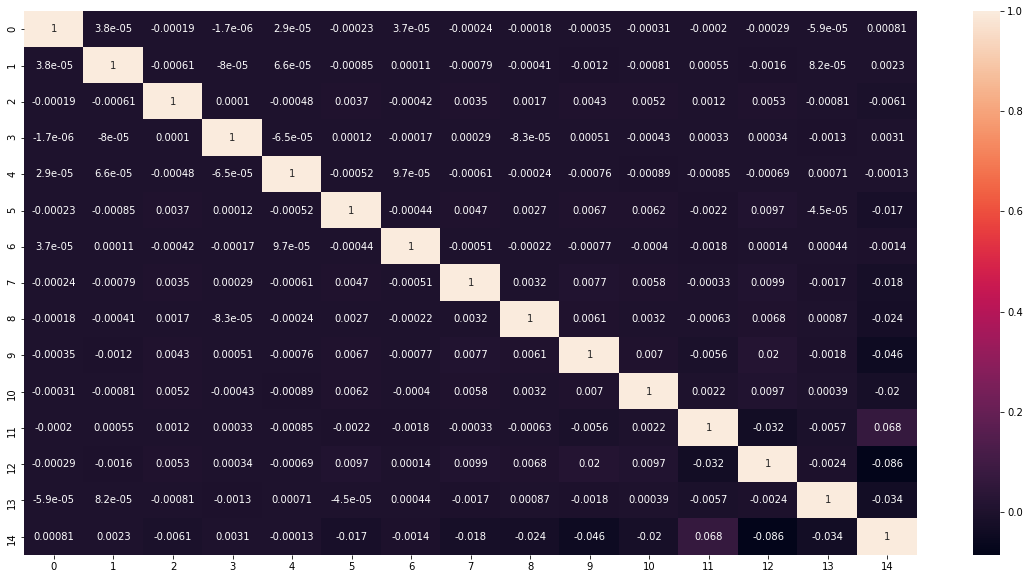

In [98]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [99]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0675679721843147 , min corr:  -0.08567176616906243


In [ ]:
#Applying logistic regression
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_pca_final,y_train)